Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import CNN

# from config_plots import global_settings
# global_settings()
import warnings
warnings.filterwarnings("ignore")

Hyper parameters

In [2]:
# defining global variables
experimentName = "test_22987_suffix50_11_dataLoader3_pretrained_depth"
showListOfSpecies = False

from configParser import ConfigParser, getModelName
config_parser = ConfigParser(experimentName)

import os
experimentName = os.path.join(experimentName, "multi-trial")
import TrialStatistics
ts = TrialStatistics.TrialStatistics(experimentName)

Use_dataLoader = 3
if Use_dataLoader == 3:
    import dataLoader3 as dataLoader
elif Use_dataLoader == 2:
    import dataLoader2 as dataLoader
else:
    import dataLoader 

Cuda support

In [3]:
# CUDA support 
if torch.cuda.is_available():
    torch.cuda.set_device(0) # 0
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print("We are using cuda")

We are using cuda


Iterate

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from confusion_matrix_plotter import plot_confusion_matrix2, generate_classification_report
import numpy as np
import os
import progressbar

paramsIterator = config_parser.getHyperpIter()  
number_of_experiments = sum(1 for e in paramsIterator)
paramsIterator = config_parser.getHyperpIter()  
experiment_index = 0

datasetManager = dataLoader.datasetManager(experimentName, showListOfSpecies)
with progressbar.ProgressBar(max_value=number_of_experiments) as bar:
    for experiment_params in paramsIterator:
        bar.update(experiment_index)
        experiment_params["numOfTrials"] = experiment_params["numOfTrials"] or 1

        print("experiment ", experiment_index+1, "/", number_of_experiments, ": ", experiment_params)

        # load images
        datasetManager.updateParams(experiment_params)
        dataset = datasetManager.getDataset()
        speciesList = dataset.getSpeciesList()
        numberOfSpecies = len(speciesList)

        confusionMatricesPerTrial = []

        for i in range(experiment_params["numOfTrials"]):
            trialName = os.path.join(experimentName, getModelName(experiment_params, i))

            # Train/Load model
            model = CNN.create_model(numberOfSpecies, experiment_params)
            train_loader, validation_loader, test_loader = datasetManager.getLoaders()
            if os.path.exists(CNN.getModelFile(trialName)):
                _, _, epochs, time_elapsed = CNN.loadModel(model, trialName)
                print("Model {0} loaded!".format(trialName))
            else:
                _, _, epochs, time_elapsed = CNN.trainModel(train_loader, validation_loader, experiment_params, model, trialName)

            # Update trial outcomes for statistics
            predlist, lbllist = CNN.getLoaderPredictions(test_loader, model)
            ts.addTrialPredictions(experiment_params, predlist, lbllist, numberOfSpecies)

            ts.addTrial(experiment_params,
                    {'loss': CNN.getCrossEntropyFromLoader(test_loader, model),
                     'accuracy': CNN.getAccuracyFromLoader(test_loader, model),
                     'time': time_elapsed,
                     'epochs': epochs
                    }, i)
        
        experiment_index = experiment_index + 1

N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment  1 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 50, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}
Loading dataset...


  0% (4 of 550) |                        | Elapsed Time: 0:00:00 ETA:   0:00:20

Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:00:39 Time:  0:00:39


550
torch.Size([550, 3, 224, 224])
torch.Size([550, 3, 50176])
dataset has a mean: tensor([0.7661, 0.7249, 0.6513]) and std: tensor([0.1420, 0.1753, 0.2096])
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth/multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/dataset.pkl written
using a pretrained resnet18 model...
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth/multi-trial/trainingIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth/multi-trial/valIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth/multi-trial/testIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth/multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/trainingLoader.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_

N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth/multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/testLoader.pkl written
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:13:47 Time:  0:13:47


Early stopping
total number of epochs:  57


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:11:28 Time:  0:11:28


Early stopping
total number of epochs:  57


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment  2 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}
using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:29:06 Time:  0:29:06


Early stopping
total number of epochs:  147


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:36:25 Time:  0:36:25


Early stopping
total number of epochs:  184


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment  3 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 550, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}
using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:20:56 Time:  0:20:56


Early stopping
total number of epochs:  106


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:21:17 Time:  0:21:17


Early stopping
total number of epochs:  107


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment  4 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 50, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}
using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:27:40 Time:  1:27:40


Early stopping
total number of epochs:  444


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:59:37 Time:  0:59:37


Early stopping
total number of epochs:  302


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment  5 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}
using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:00:55 Time:  1:00:55


Early stopping
total number of epochs:  308


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:24:57 Time:  0:24:57


Early stopping
total number of epochs:  125


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment  6 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 550, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}
using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:26:35 Time:  0:26:35


Early stopping
total number of epochs:  134


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

using a pretrained resnet18 model...
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:30:47 Time:  0:30:47


Early stopping
total number of epochs:  155


100% (6 of 6) |##########################| Elapsed Time: 7:06:48 Time:  7:06:48


Analyze

In [5]:
ts.showStatistics()
ts.saveStatistics()

Aggregated statistics


In [6]:
ts.showStatistics(False)
ts.saveStatistics(False)

Raw statistics


,image_path,suffix,training_count,validation_count,usePretrained,imageDimension,n_channels,useZCAWhitening,useNormalization,batchSize,n_epochs,numOfTrials,kernels,kernelSize,patience,loss,accuracy,time,epochs,hash,trial
0,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,50,1000,2,16 32,5,50,23.183607,0.090909,826.956704,58,-889713693346486389,0
1,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,50,1000,2,16 32,5,50,4.244424,0.236364,688.507059,58,-889713693346486389,1
2,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,200,1000,2,16 32,5,50,2.132788,0.654545,1746.658554,148,4333144586421817724,0
3,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,200,1000,2,16 32,5,50,1.528116,0.700000,2185.144972,185,4333144586421817724,1
4,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,550,1000,2,16 32,5,50,5.807554,0.436364,1256.613649,107,-7898699868013009611,0
5,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,550,1000,2,16 32,5,50,8.575654,0.254545,1277.332216,108,-7898699868013009611,1
6,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,50,1000,2,16 32,5,100,2.085835,0.745455,5260.296617,445,-9207905353421979302,0
7,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,50,1000,2,16 32,5,100,1.695506,0.800000,3577.818991,303,-9207905353421979302,1
8,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,200,1000,2,16 32,5,100,0.976256,0.836364,3655.515225,309,-2551477691190409711,0
9,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,200,1000,2,16 32,5,100,1.647975,0.572727,1496.988351,126,-2551477691190409711,1


experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 50, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}


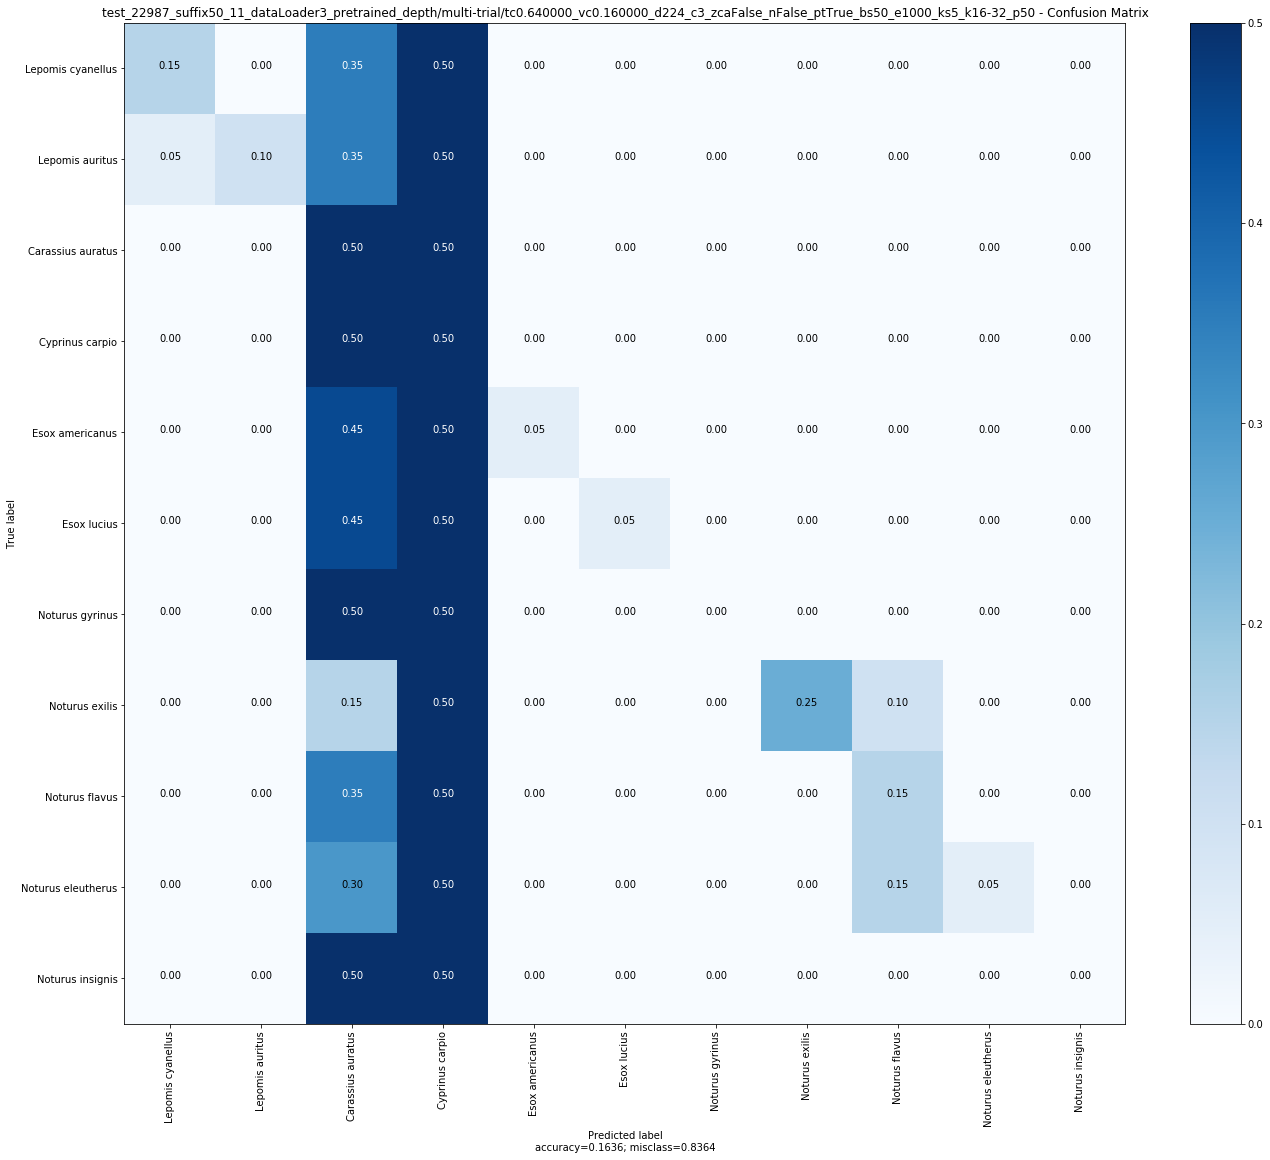

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}


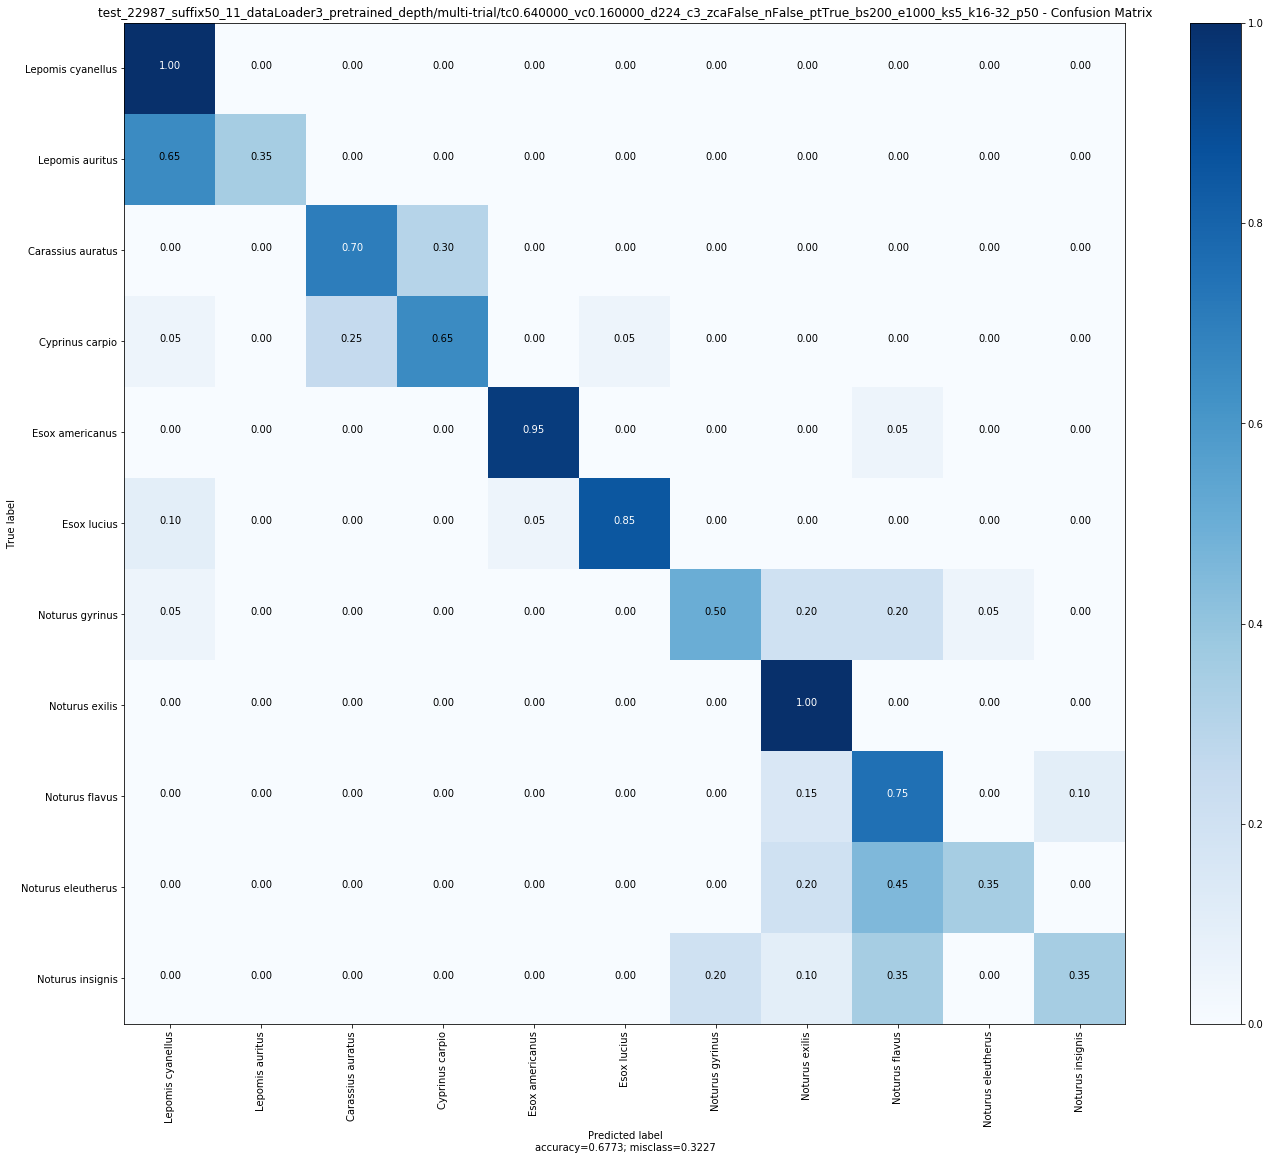

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 550, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}


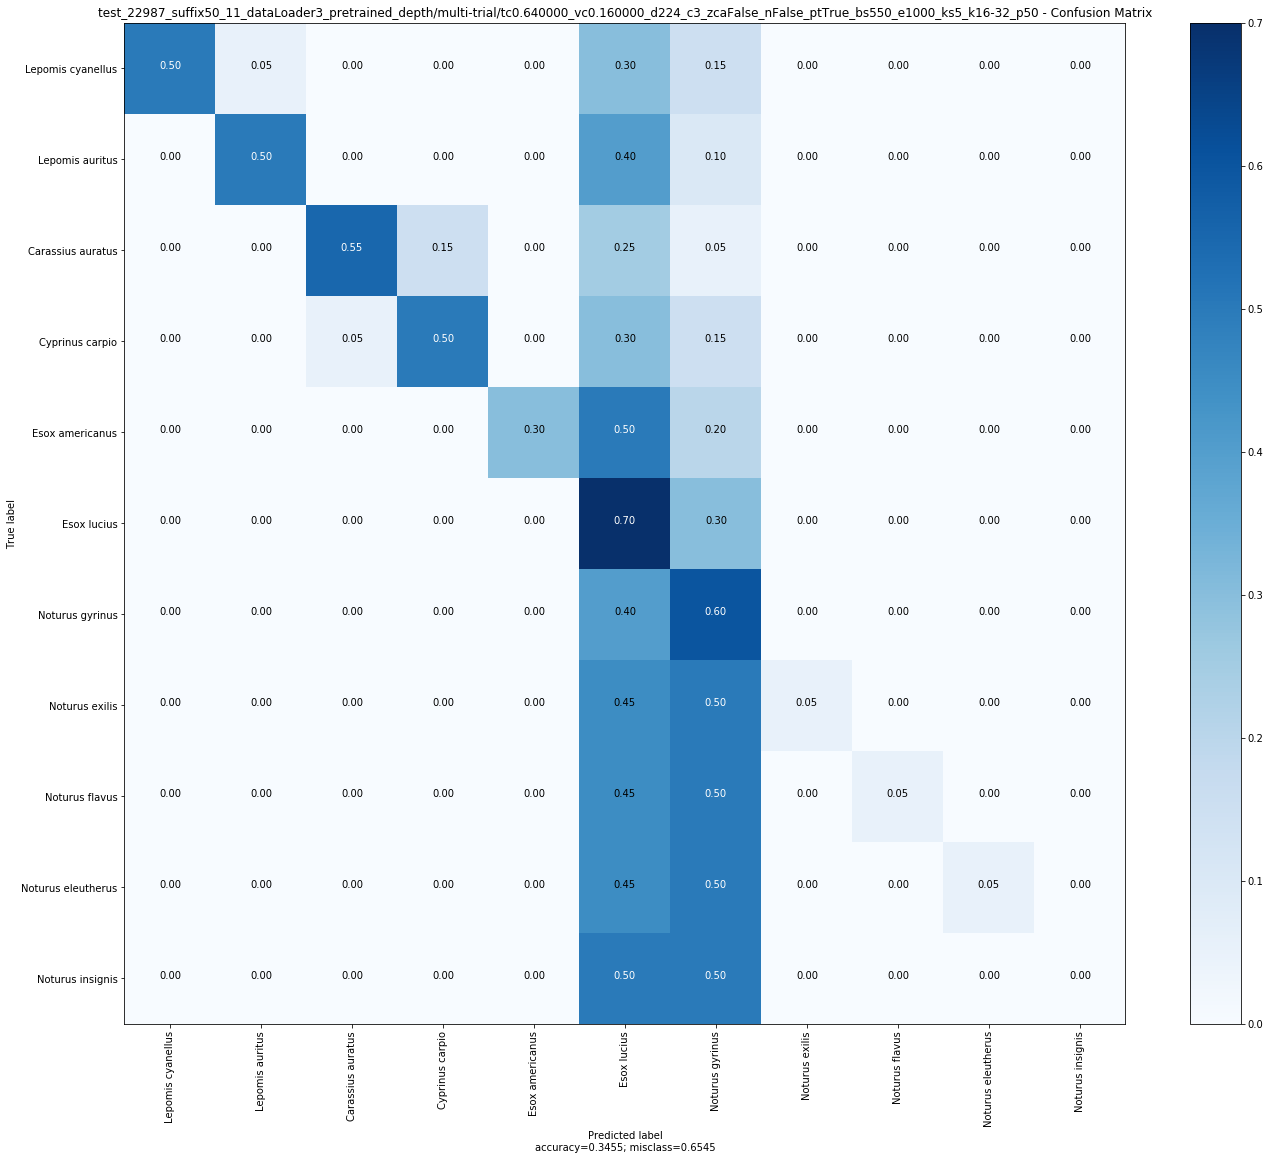

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 50, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}


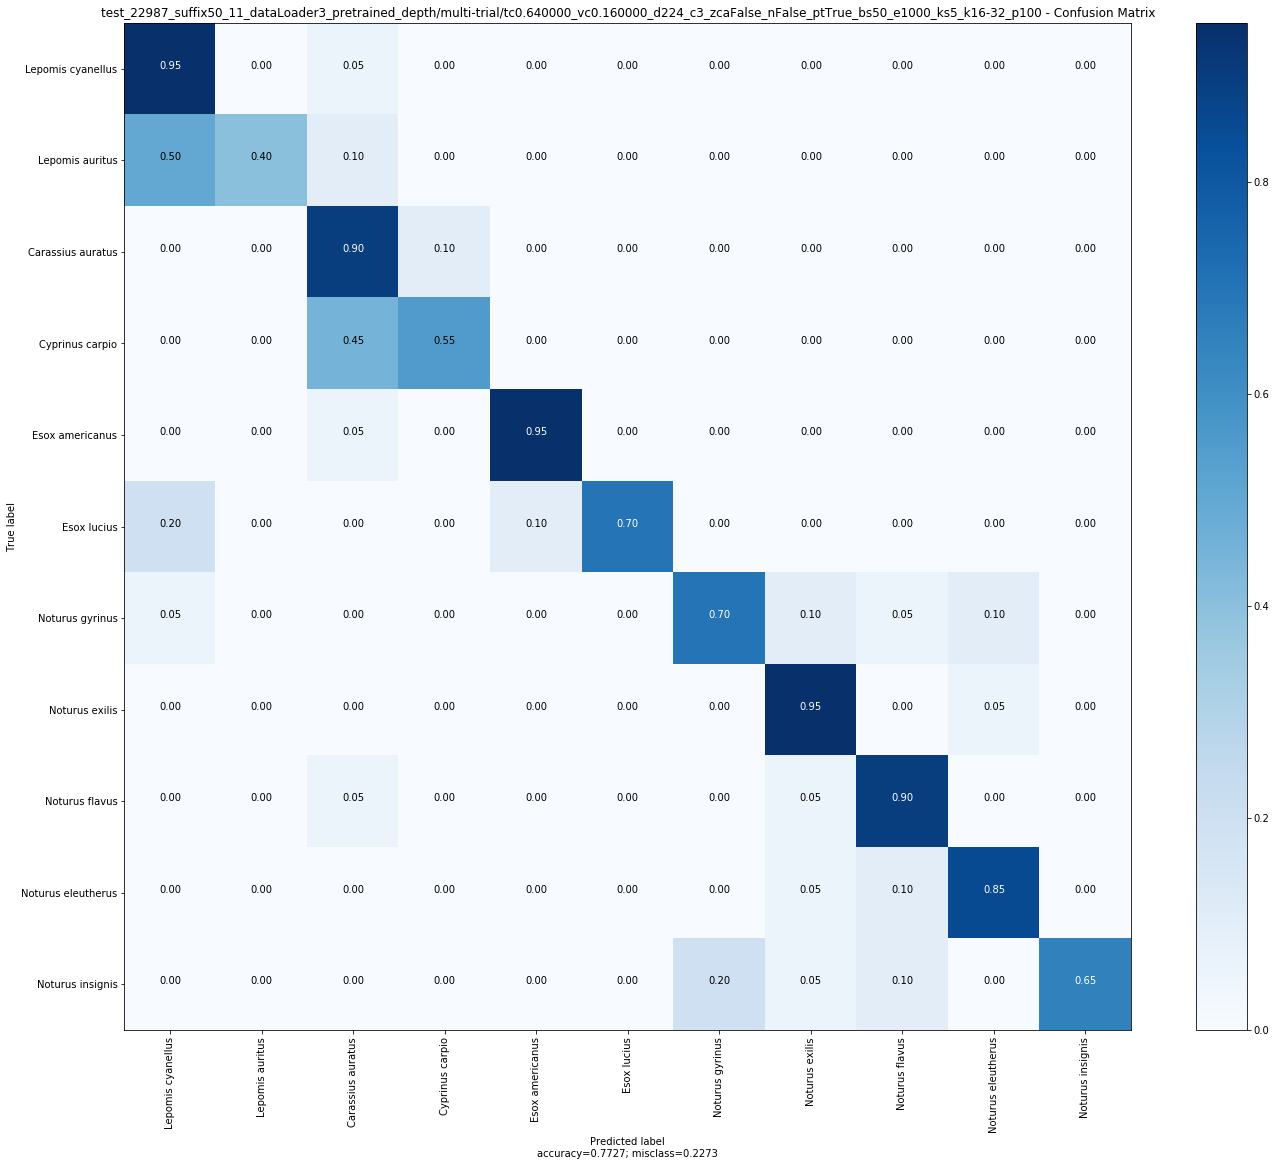

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}


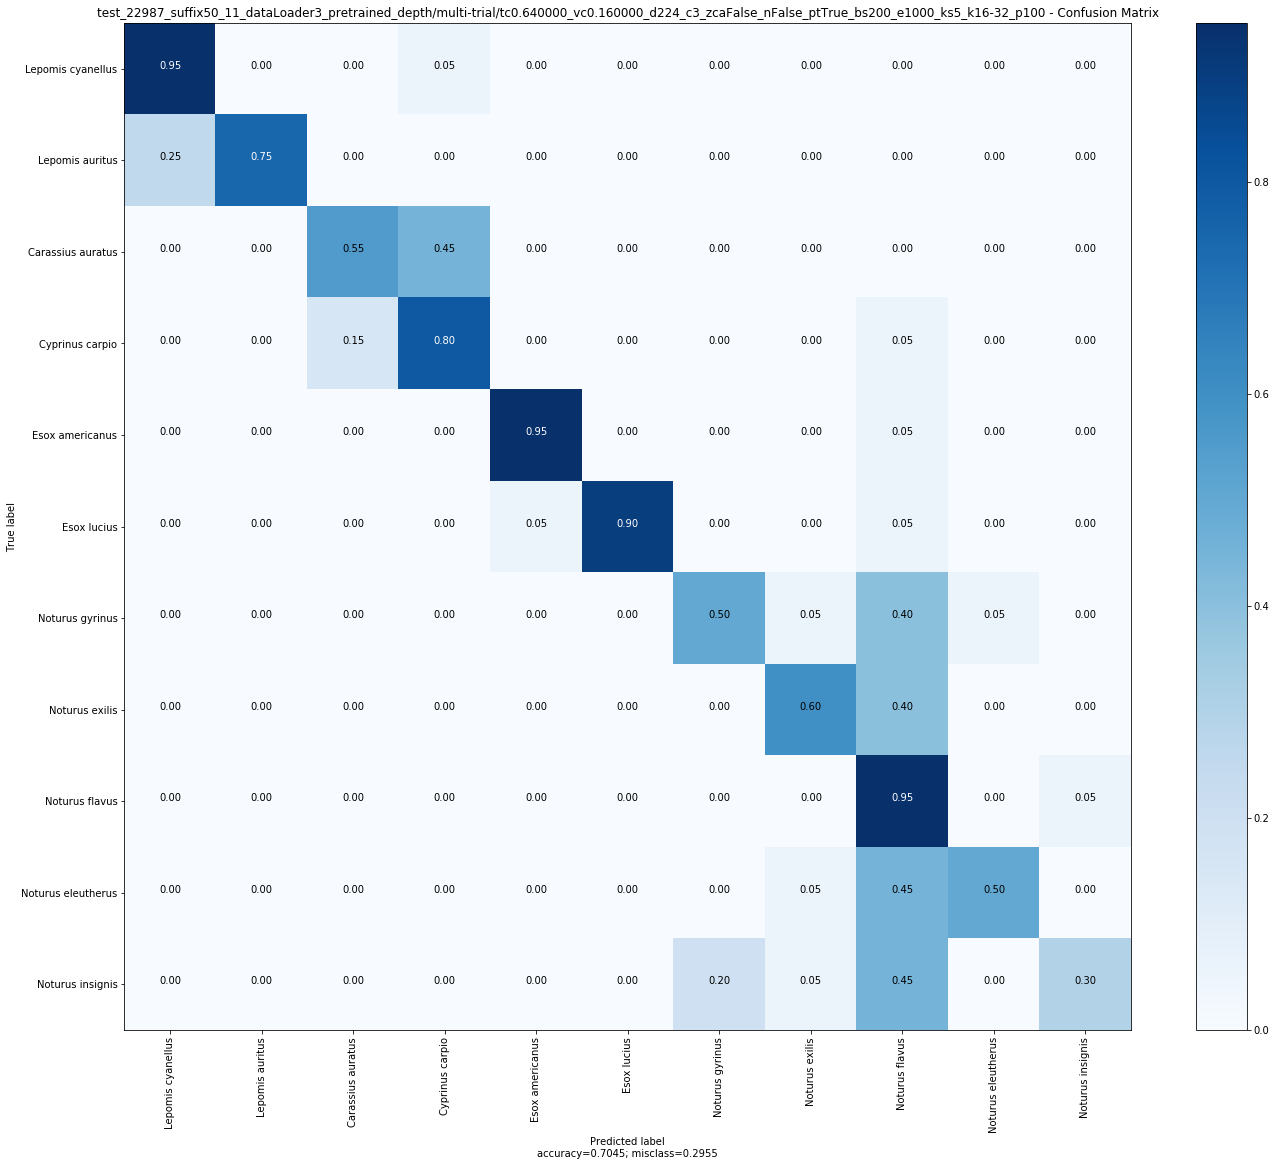

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 550, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}


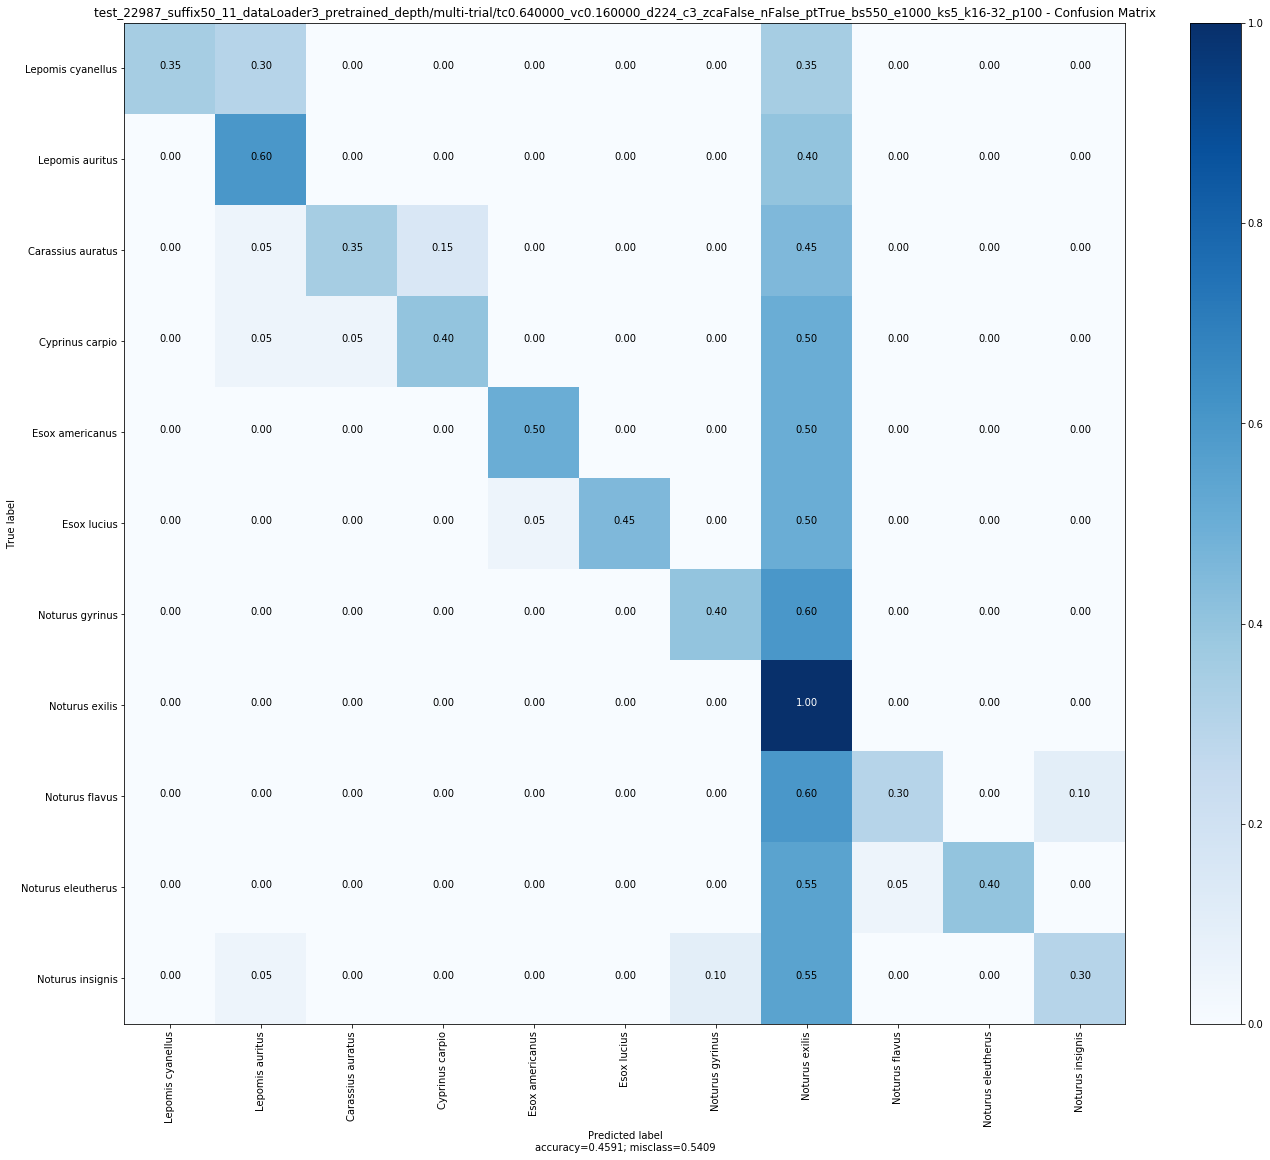

In [7]:
paramsIterator = config_parser.getHyperpIter() 
for experiment_params in paramsIterator:
    experiment_params["numOfTrials"] = experiment_params["numOfTrials"] or 1
    
    print("experiment: ", experiment_params)
    
    datasetManager.updateParams(experiment_params)
    dataset = datasetManager.getDataset()
    speciesList = dataset.getSpeciesList()
    ts.printTrialConfusionMatrix(experiment_params, speciesList, True)

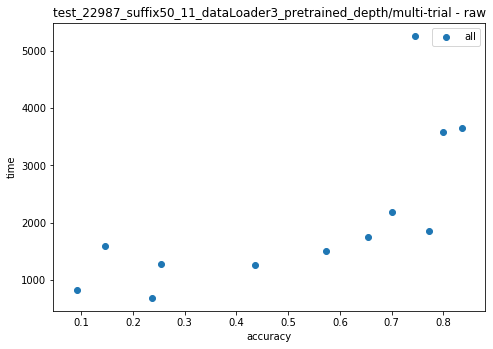

In [8]:
ts.trialScatter('accuracy', 'time', False)

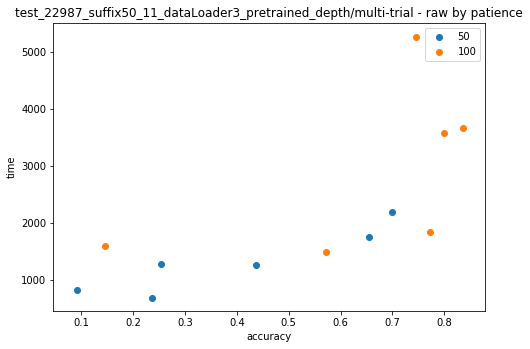

In [11]:
ts.trialScatter('accuracy', 'time', False, 'patience')

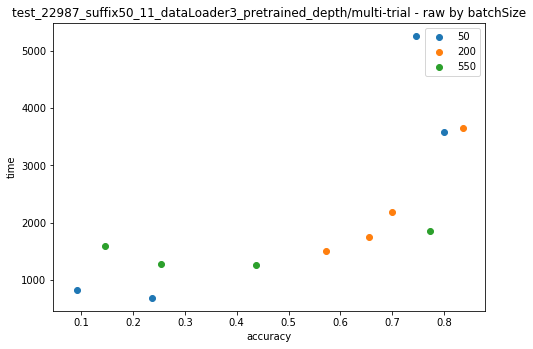

In [12]:
ts.trialScatter('accuracy', 'time', False, 'batchSize')